Read data
Fit
K 1
Train accuracy 1.0
Test accuracy 0.871
Fit
K 2
Train accuracy 1.0
Test accuracy 0.871
Fit
K 3
Train accuracy 0.963
Test accuracy 0.871
Fit
K 4
Train accuracy 0.962
Test accuracy 0.873
Fit
K 5
Train accuracy 0.942
Test accuracy 0.871
Fit
K 6
Train accuracy 0.946
Test accuracy 0.868
Fit
K 7
Train accuracy 0.935
Test accuracy 0.859
Fit
K 8
Train accuracy 0.932
Test accuracy 0.863
Fit
K 9
Train accuracy 0.924
Test accuracy 0.86
Fit
K 10
Train accuracy 0.919
Test accuracy 0.867
Fit
K 11
Train accuracy 0.915
Test accuracy 0.855
Fit
K 12
Train accuracy 0.911
Test accuracy 0.852
Fit
K 13
Train accuracy 0.901
Test accuracy 0.846
Fit
K 14
Train accuracy 0.9
Test accuracy 0.85
Fit
K 15
Train accuracy 0.9
Test accuracy 0.844
Fit
K 16
Train accuracy 0.895
Test accuracy 0.845
Fit
K 17
Train accuracy 0.891
Test accuracy 0.842
Fit
K 18
Train accuracy 0.883
Test accuracy 0.838
Fit
K 19
Train accuracy 0.888
Test accuracy 0.834
Fit
K 20
Train accuracy 0.882
Test accuracy 0.835
Fit
K 21


ValueError: x and y must have same first dimension, but have shapes (23,) and (24,)

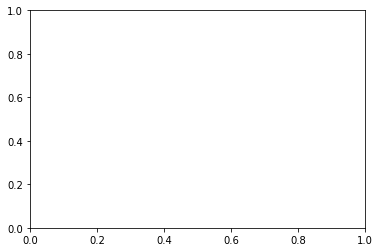

In [7]:
import numpy as np
from get_data import xor_data
from get_data import donut_data
from get_data import fig_data
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


class KNN(object):
    
    def __init__(self,k):
        self.k=k
        
    def fit(self,X,Y):
        self.X=X
        self.Y=Y
        
    def predict(self,X):
        
        Y_pred=np.zeros(len(X))

        dist_list=[]
        y_list=[]
        K_list=[]

        for i,x in enumerate(X):   #pick a point loop over all domain for distances

            for j,xt in enumerate(self.X):
                dis=np.dot((x-xt),(x-xt))
                dist_list.append(dis)
                y_list.append(self.Y[j])

            zipped=zip(dist_list,y_list)  
            zipped_sorted=sorted(zipped, key=lambda xx: xx[0])

            for ii in range(self.k):
                K_list.append(int(zipped_sorted[ii][1]))

            max_count=0
            for iii in K_list:

                if(K_list.count(iii)>max_count):      #this way if there is multiple with same count, you get the first occurance 
                    max_count=K_list.count(iii)
                    max_int=iii

            Y_pred[i]=max_int
            dist_list=[]
            y_list=[]
            K_list=[]
        return Y_pred

    def accuracy(self,X,Y):
        YP=self.predict(X)
        return np.mean(YP==Y)


if __name__=='__main__':
    
    acc_vec=[]
    acc_vec2=[]
    
    print('Read data')
    Xtrain,Ytrain,Xtest,Ytest=fig_data(limit=2000,ratio=0.5)
    for k in range(1,25):
        knn=KNN(k)
        knn.fit(Xtrain,Ytrain)
        print('Fit')
        print('K',k)
        print('Train accuracy',knn.accuracy(Xtrain,Ytrain))
        print('Test accuracy',knn.accuracy(Xtest,Ytest))
        acc_vec.append(knn.accuracy(Xtrain,Ytrain))
        acc_vec2.append(knn.accuracy(Xtest,Ytest))
    

    
    

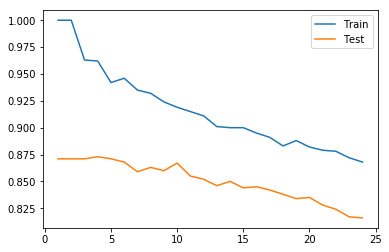

In [11]:
plt.plot(np.array(range(1,25)),acc_vec,label='Train')
plt.plot(np.array(range(1,25)),acc_vec2,label='Test')
plt.legend()